In [1]:
!pip install scikit-learn

In [2]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()
x = iris.data
y = iris.target
iris.feature_names

import pandas as pd
df = pd.DataFrame(x, columns = iris.feature_names)
df['Name'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
import urllib.request as req
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv'
req.urlretrieve(url,'iris.csv')
print('저장됨...')

iris_data = pd.read_csv('iris.csv')
iris_data

저장됨...


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#data
# x = iris_data.loc[:,' SepalLength'',SepalWidth','PetalLength','PetalWidth']
# x = iris_data.loc[:, iris_data.columns[0:-1]]

x = iris_data.drop('Name', axis=1)
#label
y = iris_data.loc[:, 'Name']

x2 = [[5.1,3.0,1.5,0.2]]
model = LinearSVC()
model.fit(x,y)
pre_label = model.predict(x2)
print(pre_label)

['Iris-setosa']


C:\Users\student\Anaconda3\envs\multi\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

정확도: 0.9666666666666667


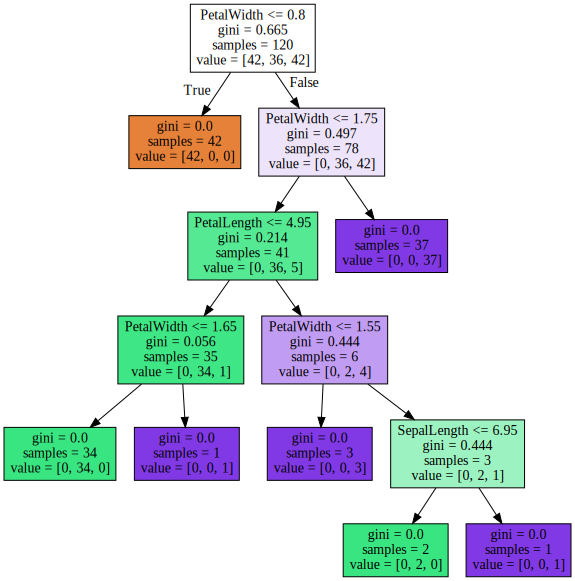

In [10]:
#data
# x = iris_data.loc[:,' SepalLength'',SepalWidth','PetalLength','PetalWidth']
# x = iris_data.loc[:, iris_data.columns[0:-1]]

x = iris_data.drop('Name', axis=1)

# model = LinearSVC()
# model = KNeighborsClassifier(n_neighbors=1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

model = DecisionTreeClassifier(random_state=153)

from sklearn.model_selection import train_test_split
#학습데이터와 테스트데이터로 나눈다.
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size = 0.2, \
                                                                 train_size = 0.8, shuffle = True, random_state = 121)

#학습
model.fit(train_data, train_label)
pre_label = model.predict(test_data)
print("정확도:", accuracy_score(test_label,pre_label))

#feature_name : 칼럼이름
#impurity : 불순도, 지니지수 보여주기
export_graphviz(model, out_file='Tree.dot', feature_names = iris_data.columns[0:-1], impurity=True, filled = True)
with open('Tree.dot') as f:
    dot_g = f.read()
graphviz.Source(dot_g)

정확도: 0.9666666666666667


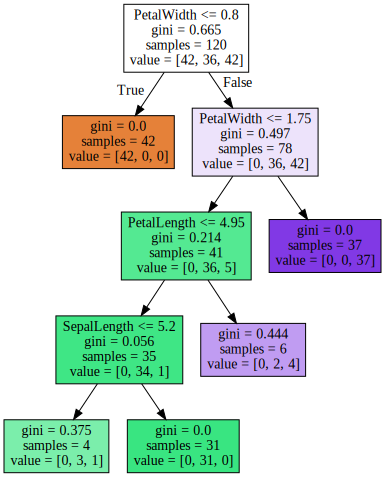

In [15]:
#data
# x = iris_data.loc[:,' SepalLength'',SepalWidth','PetalLength','PetalWidth']
# x = iris_data.loc[:, iris_data.columns[0:-1]]

x = iris_data.drop('Name', axis=1)

# model = LinearSVC()
# model = KNeighborsClassifier(n_neighbors=1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# model = DecisionTreeClassifier(max_depth=4, random_state=153)
# model = DecisionTreeClassifier(min_samples_split=4, random_state=153)
model = DecisionTreeClassifier(min_samples_leaf=4, random_state=153)

from sklearn.model_selection import train_test_split
#학습데이터와 테스트데이터로 나눈다.
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size = 0.2, \
                                                                 train_size = 0.8, shuffle = True, random_state = 121)

#학습
model.fit(train_data, train_label)
pre_label = model.predict(test_data)
print("정확도:", accuracy_score(test_label,pre_label))

#feature_name : 칼럼이름
#impurity : 불순도, 지니지수 보여주기
export_graphviz(model, out_file='Tree.dot', feature_names = iris_data.columns[0:-1], impurity=True, filled = True)
with open('Tree.dot') as f:
    dot_g = f.read()
graphviz.Source(dot_g)

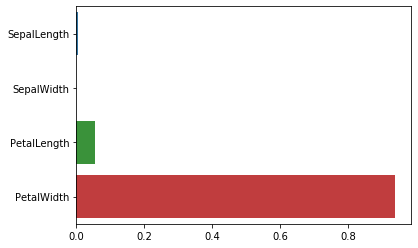

In [24]:
#중요도
a = model.feature_importances_
b = iris_data.columns[0:-1]
list(zip(a,b))

import seaborn as sns
sns.barplot(x=a, y=b)

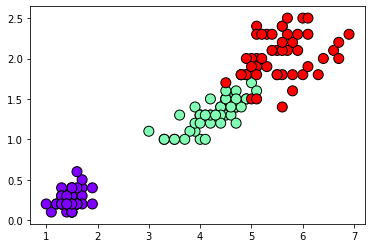

In [40]:
import matplotlib.pyplot as pls

names = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
target = iris_data.Name.apply(lambda x : names[x])

pls.scatter(iris_data.iloc[:,2],iris_data.iloc[:,3],
            c = target, marker = 'o', s = 100, cmap = 'rainbow', edgecolors = 'k')


In [26]:
iris_data.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [50]:
#카테고리를 수치화 하기
from sklearn.preprocessing import LabelEncoder

items = ['coffee', 'juice', 'fruit', 'snack', 'coffee', 'coffee']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 2, 1, 3, 0, 0], dtype=int64)

In [51]:
#카테고리를 수치화 하기
from sklearn.preprocessing import LabelEncoder

items = ['coffee', 'juice', 'fruit', 'snack', 'coffee', 'coffee']
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
labels

array([0, 2, 1, 3, 0, 0], dtype=int64)

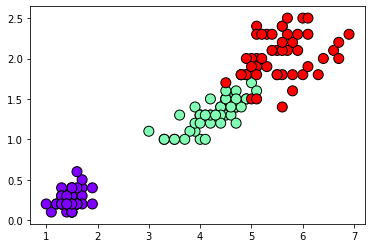

In [53]:
import matplotlib.pyplot as pls

encoder = LabelEncoder()
target = encoder.fit_transform(iris_data.Name)

pls.scatter(iris_data.iloc[:,2],iris_data.iloc[:,3],
            c = target, marker = 'o', s = 100, cmap = 'rainbow', edgecolors = 'k')


In [98]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


In [102]:
import numpy as np

#2차원 배열
X_features1 = iris_data.iloc[:,0:2].values
X_features2 = iris_data.iloc[:,2:4].values

y_labels = encoder.fit_transform(iris_data.Name)
# y_labels = target.values

C:\Users\student\Anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'
C:\Users\student\Anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'


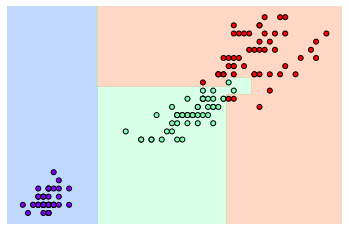

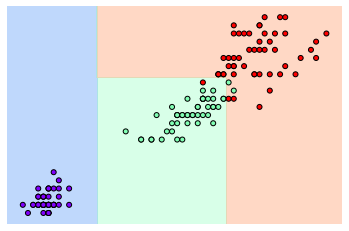

In [108]:
# 결정 트리의 Decsion Boundary 시각화.
model = DecisionTreeClassifier().fit(X_features2, y_labels)
visualize_boundary(model, X_features2, y_labels)
# 6개 이하의 데이터는 리프노드를 생성할 수 있도록 리프노드 생성규칙을 완화  
model = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features2, y_labels)
visualize_boundary(model, X_features2, y_labels)


In [121]:
x = iris_data.iloc[:,:4]
y = iris_data.Name
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, \
                                                                 train_size = 0.8, shuffle = True, random_state = 121)
#학습
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [123]:
#그리드를 사용한 복수 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

params = { 'max_depth':[4,6,8,10], 'min_samples_leaf':[4,6,8,10], 'min_samples_split':[4,6,8,10] }

grid_cv = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(x_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
print('best_estimator_:', grid_cv.best_estimator_)
pre = grid_cv.predict(x_test)
acScore = accuracy_score(y_test,pre)
print('acScore:', acScore)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GridSearchCV 최고 평균 정확도 수치:0.9583
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 4}
best_estimator_: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
acScore: 0.9666666666666667


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    0.8s finished
C:\Users\student\Anaconda3\envs\multi\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [127]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00220,0.001327,0.00100,8.944157e-04,4,4,4,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1
1,0.00220,0.000400,0.00120,4.000425e-04,4,4,6,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1
2,0.00180,0.000400,0.00100,1.168008e-07,4,4,8,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1
3,0.00160,0.000490,0.00100,9.536743e-08,4,4,10,"{'max_depth': 4, 'min_samples_leaf': 4, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1
4,0.00180,0.000400,0.00080,3.999949e-04,4,6,4,"{'max_depth': 4, 'min_samples_leaf': 6, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1
5,0.00060,0.000800,0.00000,0.000000e+00,4,6,6,"{'max_depth': 4, 'min_samples_leaf': 6, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1
6,0.00312,0.006240,0.00000,0.000000e+00,4,6,8,"{'max_depth': 4, 'min_samples_leaf': 6, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1
7,0.00000,0.000000,0.00312,6.239986e-03,4,6,10,"{'max_depth': 4, 'min_samples_leaf': 6, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1
8,0.00312,0.006240,0.00000,0.000000e+00,4,8,4,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1
9,0.00000,0.000000,0.00000,0.000000e+00,4,8,6,"{'max_depth': 4, 'min_samples_leaf': 8, 'min_s...",0.884615,1.0,1.0,1.0,0.913043,0.958333,0.050968,1


In [174]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
#warnings.filterwarnings(module='sklearn*', action='ignore', category='DeprecationWarning')

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
#cancer.feature_names

df = pd.DataFrame(x, columns=cancer.feature_names)
df.head()


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, train_size = 0.8, shuffle = True, random_state = 121)

In [142]:
#앙상블 학습
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
#소프트 보팅: 다수의 분류기(classifier)들의 class확률을 평균하여 결정
vo_model = VotingClassifier(estimators=[("LR", lr_model), ('KNN', knn_model)], voting="soft")

#votingClassifier 학습/예측/평가
vo_model.fit(X_train, y_train)
pred = vo_model.predict(X_test)
print("Voting분류기 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

#개별모델의 학습/예측/평가
classifiers = [lr_model, knn_model ]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

Voting분류기 정확도 : 0.9737
LogisticRegression 정확도 : 0.9825
KNeighborsClassifier 정확도 : 0.9386


C:\Users\student\Anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\student\Anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9385964912280702

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y = wine["quality"]
y = y.apply(lambda val: 0 if val<=4 else(1 if val<=7 else 2))

x = wine.drop("quality", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred)) #매우낮음

              precision    recall  f1-score   support

           0       0.53      0.27      0.36        37
           1       0.95      0.99      0.97       914
           2       0.73      0.38      0.50        29

    accuracy                           0.94       980
   macro avg       0.74      0.55      0.61       980
weighted avg       0.93      0.94      0.93       980

정답률= 0.9408163265306122


C:\Users\student\Anaconda3\envs\multi\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [230]:
wine = pd.read_csv('winequality-white.csv',";")
wine.shape
wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


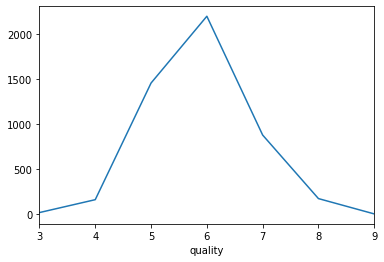

In [164]:
cnt = wine.groupby('quality')['quality'].count()
print(cnt)
cnt.plot()

In [168]:
#3,4 -> 0
#5,6,7 -> 1
#8~ -> 2
result = []
for val in list(y):
    if val<=4:
        result += [0]
    elif val<=7:
        result += [1]
    else:
        result += [2]



{0, 1, 2}

In [186]:
y = y.apply(lambda val: 0 if val<=4 else(1 if val<=7 else 2))
set(y)
y

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    1
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64